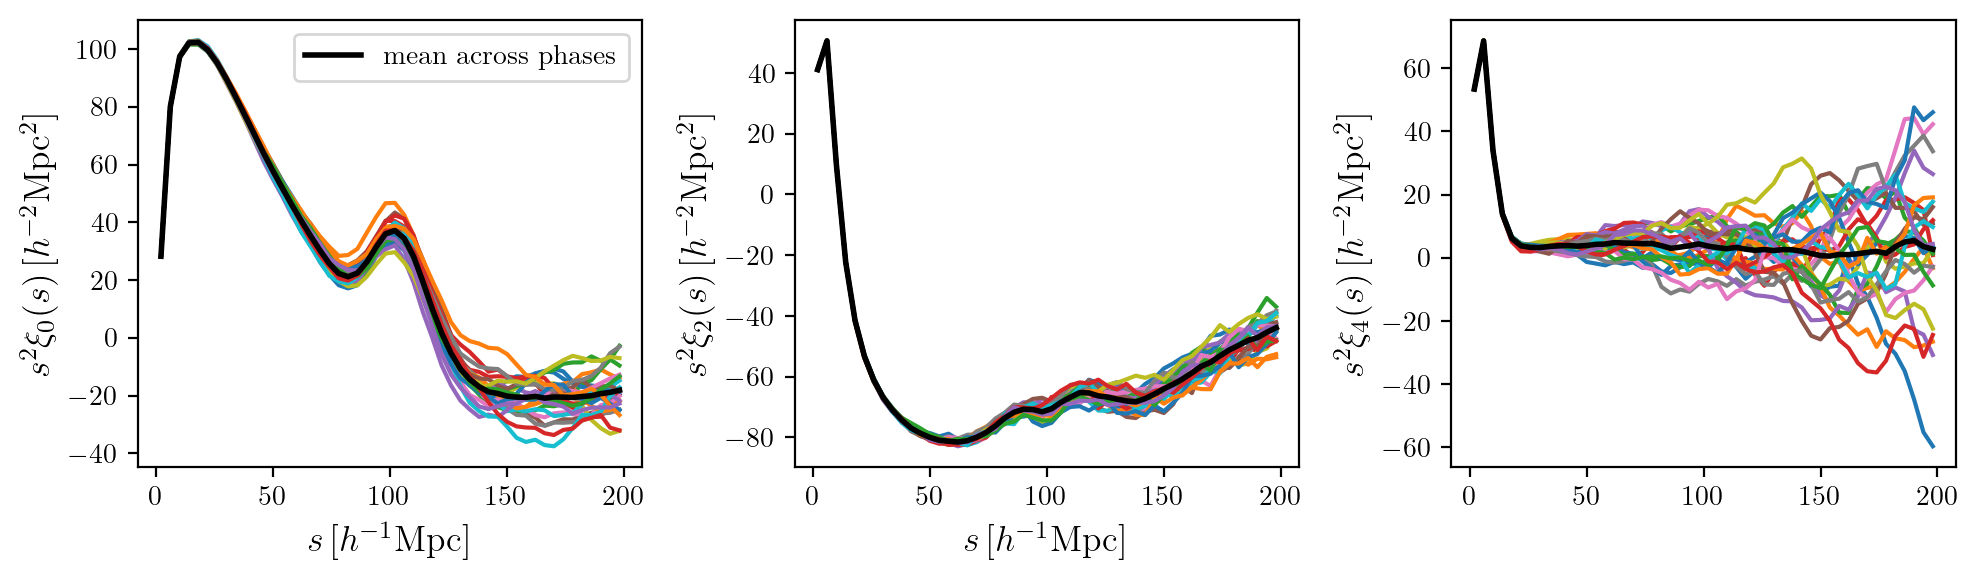

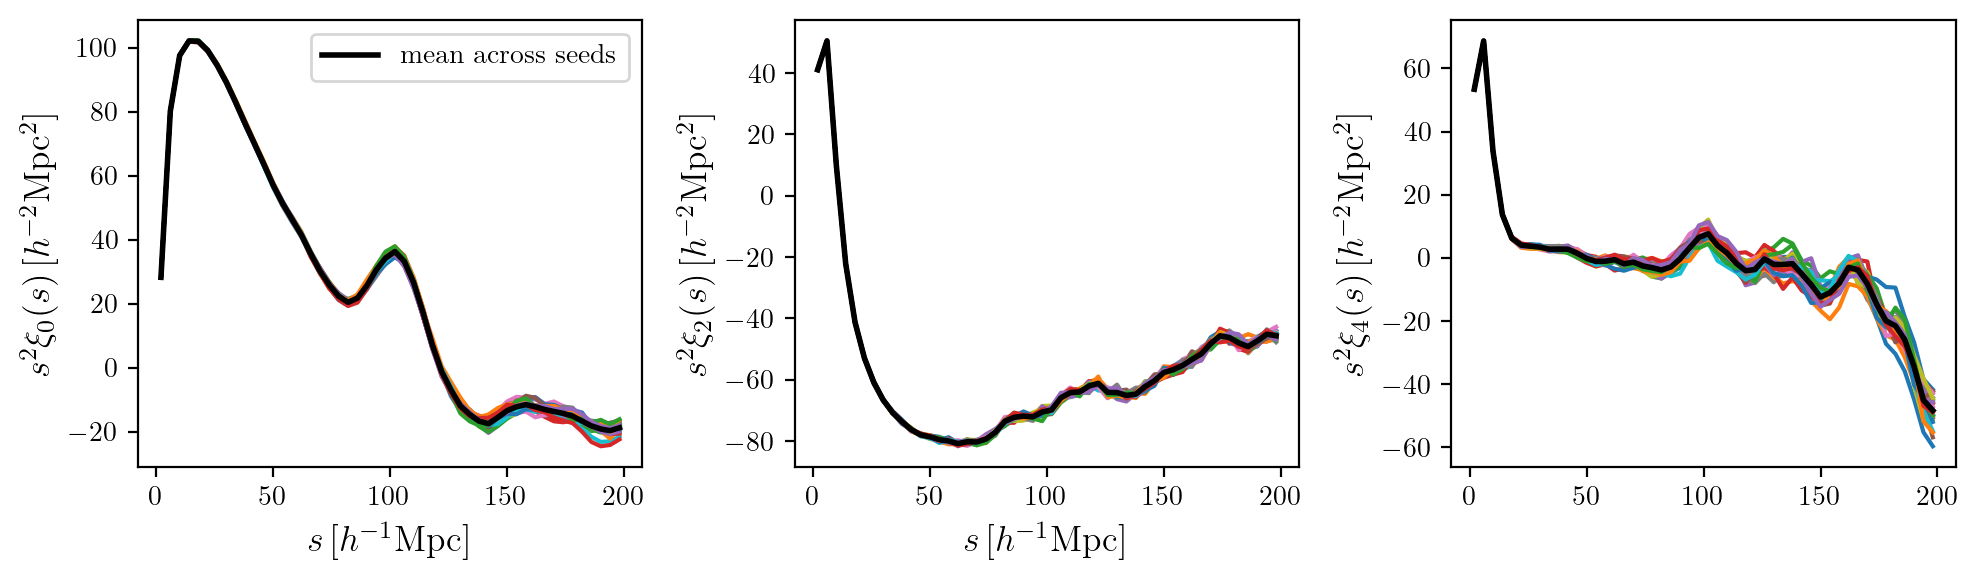

In [112]:
from pycorr import TwoPointCorrelationFunction
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def read_multipoles(hod_idx, phase_idx=0, seed_idx=0):
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph{phase_idx:03}/seed{seed_idx}/'
    data_fn = Path(data_dir) / f'tpcf_hod{hod_idx:03}.npy'
    data = TwoPointCorrelationFunction.load(data_fn)[::4]
    s, multipoles = data(ells=(0, 2, 4), return_sep=True)
    return s, multipoles

def get_mean_phases(nphases, hod_idx, seed_idx=0):
    phases = []
    for phase_idx in range(nphases):
        s, poles = read_multipoles(hod_idx, phase_idx, seed_idx)
        phases.append(poles)
    return np.array(phases).mean(axis=0), np.array(phases)

def get_mean_seeds(nseeds, hod_idx, phase_idx=0):
    mean = []
    for seed_idx in range(nseeds):
        s, poles = read_multipoles(hod_idx, phase_idx, seed_idx)
        mean.append(poles)
    return np.asarray(mean).mean(axis=0)

def get_mean_hods(nhods, phase_idx=0, seed_idx=0):
    hods = []
    for hod_idx in range(nhods):
        s, poles = read_multipoles(hod_idx, phase_idx, seed_idx)
        hods.append(poles)
    return np.array(hods).mean(axis=0), np.array(hods)

hod_idx = 466
seed_idx = 0 
nphases = 25

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for phase_idx in range(nphases):
    s, poles = read_multipoles(hod_idx=hod_idx, phase_idx=phase_idx, seed_idx=seed_idx)
    for ell in (0, 2, 4):
        ax[ell//2].plot(s, s**2 * poles[ell//2])
    
mean_phases, phases = get_mean_phases(nphases=nphases, hod_idx=hod_idx)

for ell in (0, 2, 4):
    ax[ell//2].plot(s, s**2 * mean_phases[ell//2], color='k', lw=2.0, label='mean across phases')
ax[0].legend()

ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[2].set_ylabel(r'$s^2\xi_4(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[0].legend()

plt.tight_layout()
plt.show()


phase_idx = 0
hod_idx = 466
nseeds = 25

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for seed_idx in range(nseeds):
    s, poles = read_multipoles(hod_idx=hod_idx, phase_idx=phase_idx, seed_idx=seed_idx)
    for ell in (0, 2, 4):
        ax[ell//2].plot(s, s**2 * poles[ell//2])
    
mean_seeds = get_mean_seeds(nseeds=nseeds, hod_idx=hod_idx, phase_idx=phase_idx)

for ell in (0, 2, 4):
    ax[ell//2].plot(s, s**2 * mean_seeds[ell//2], color='k', lw=2.0, label='mean across seeds')
ax[0].legend()

ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[2].set_ylabel(r'$s^2\xi_4(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[0].legend()

plt.tight_layout()
plt.show()

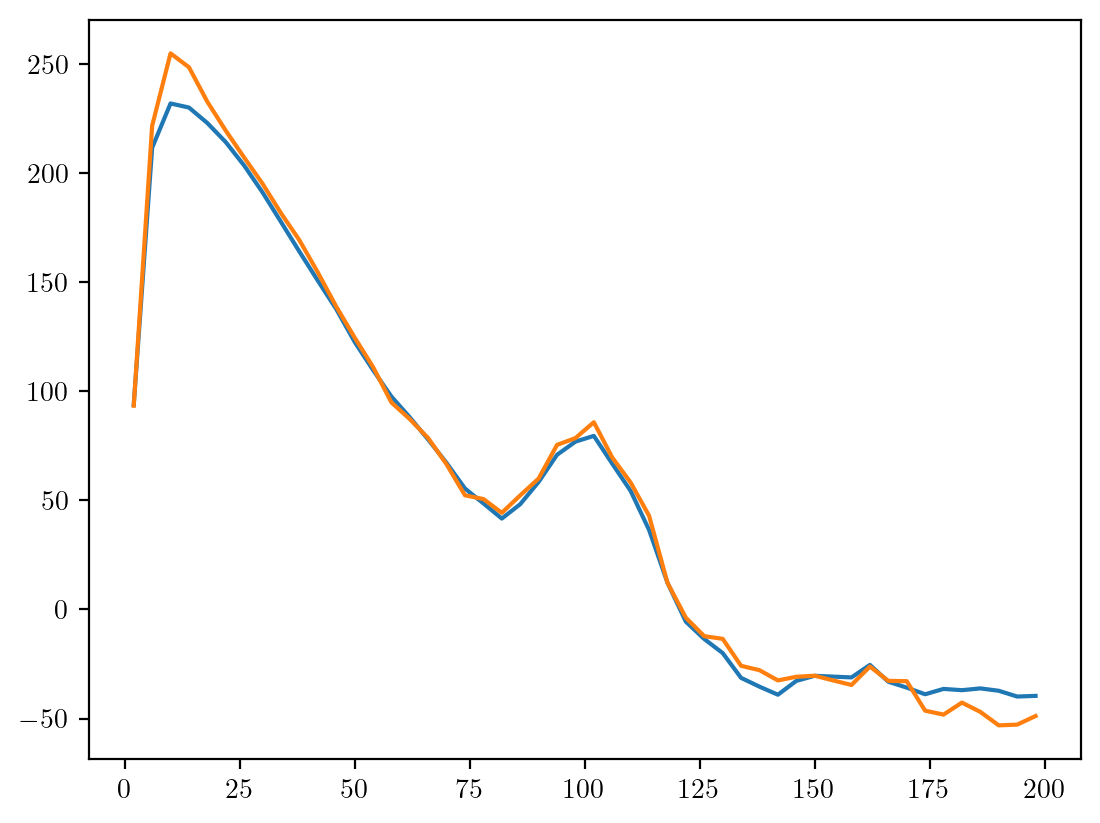

In [126]:
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA

def get_pca_projection(data, npca=1):
    pca = PCA(n_components=npca, svd_solver='full')
    pca_data = pca.fit_transform(data - data.mean(axis=0))
    pca_data = pca.inverse_transform(pca_data) + data.mean(axis=0)
    return pca_data

mean_hods, hods = get_mean_hods(nhods=25)

pca_hods = get_pca_projection(hods[:, 0])

fig, ax = plt.subplots()

ax.plot(s, s**2*pca_hods[0])
ax.plot(s, s**2*hods[0, 0])

plt.show()

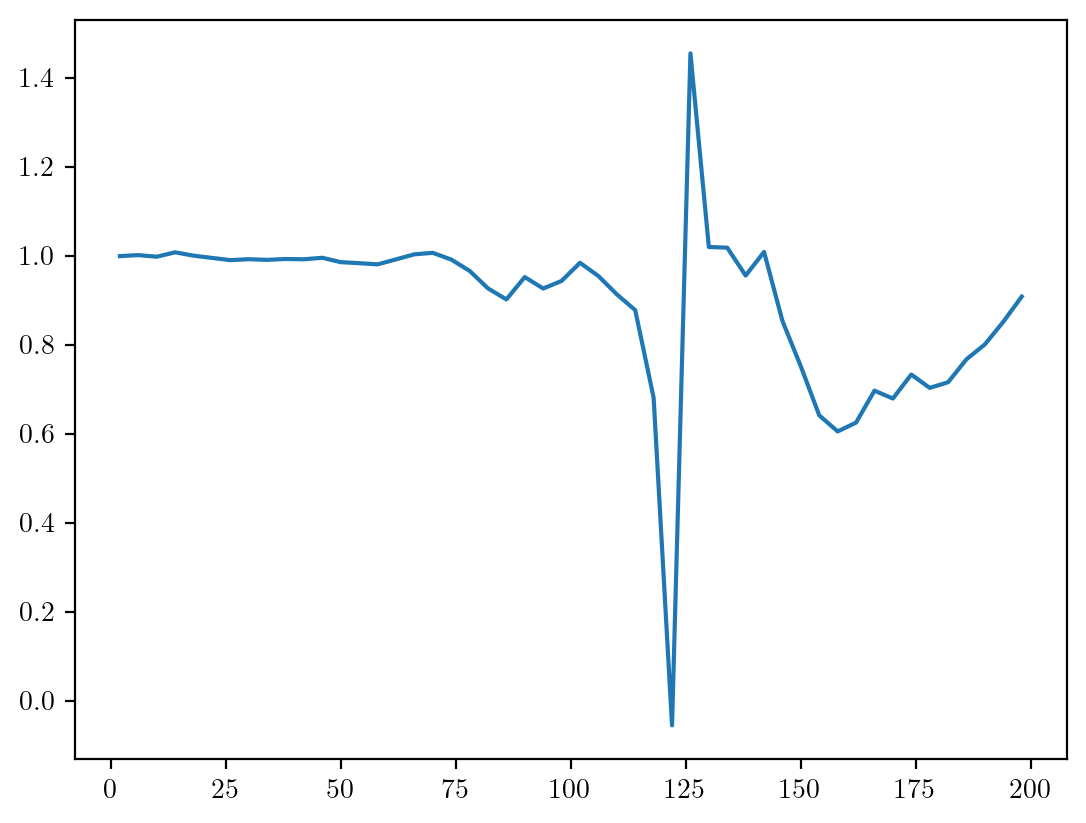

In [197]:
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA

# fig, ax = plt.subplots(1, 3, figsize=(10, 3))

phase_idx = 0
seed_idx = 0

correction_phase = []
correction_seed = []
correction_full = []

mean_hods, hods = get_mean_hods(nhods=25)
pca_hods = get_pca_projection(hods[:, 0], npca=3)

for hod_idx, poles in enumerate(pca_hods):
    # s, poles = read_multipoles(hod_idx=hod_idx, phase_idx=phase_idx, seed_idx=seed_idx)
    mean_phases, phases = get_mean_phases(nphases=nphases, hod_idx=hod_idx)
    # mean_seeds = get_mean_seeds(nseeds=25, hod_idx=hod_idx)
    cp = poles / mean_phases[0]
    # cs = poles / mean_seeds
    # cf = cp * cs
    
    # correction_seed.append(cs)
    correction_phase.append(cp)
    # correction_full.append(cf)
    
    # for ell in (0, 2, 4):
        # ax[ell//2].plot(s, cf[ell//2])
        # ax[ell//2].plot(s, poles[ell//2] / mean_phases[ell//2])
    

correction_phase = np.median(np.array(correction_phase), axis=0)

fig, ax = plt.subplots()
ax.plot(s, correction_phase)

plt.show()

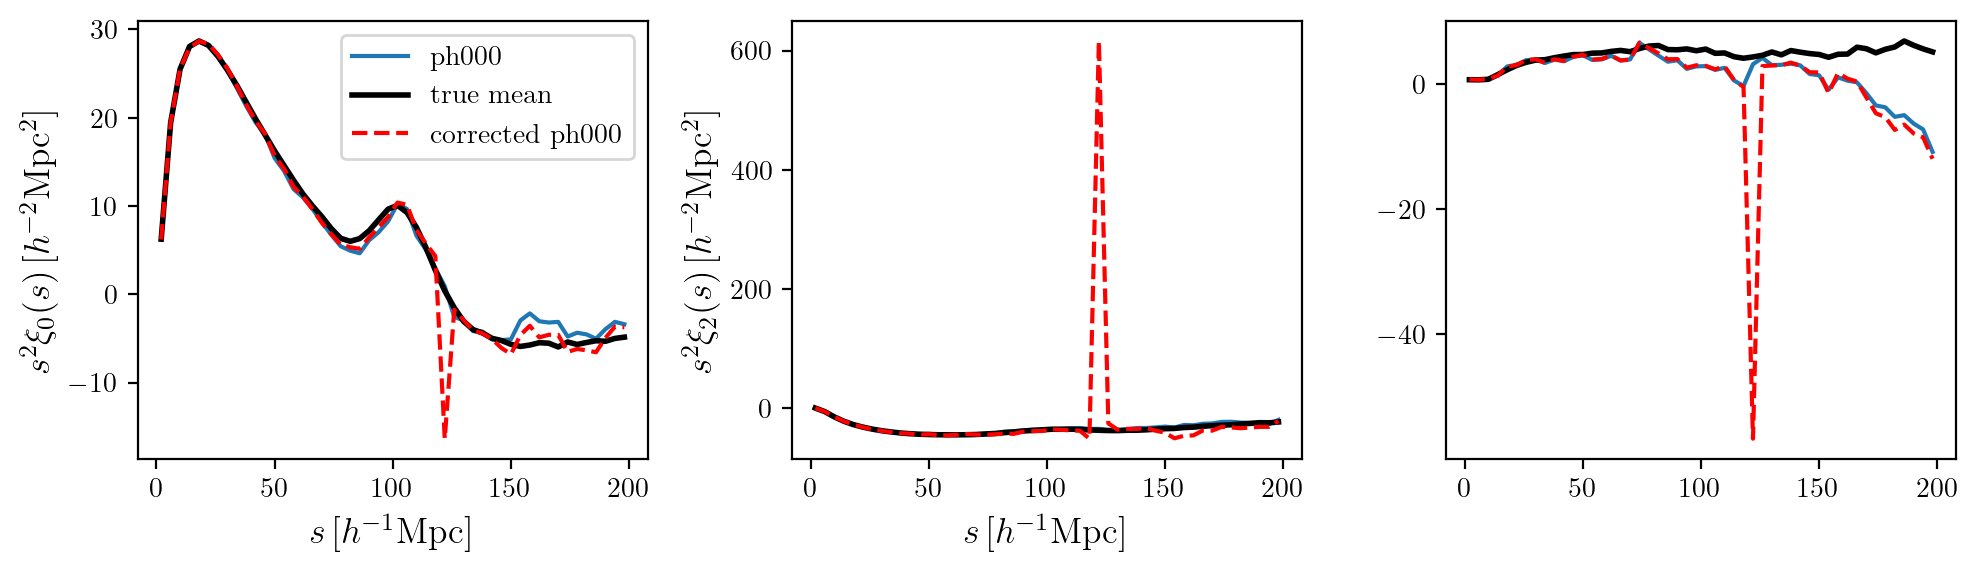

In [198]:
nphases = 25
hod_idx = 6
phase_idx = 0

s, poles = read_multipoles(phase_idx=phase_idx, hod_idx=hod_idx, seed_idx=0)
mean_phases, phases = get_mean_phases(nphases=nphases, hod_idx=hod_idx)


fig, ax = plt.subplots(1, 3, figsize=(10, 3))
phase_idx = 0

for ell in (0, 2, 4):
    ax[ell//2].plot(s, s**2 * poles[ell//2], label='ph000')
    ax[ell//2].plot(s, s**2 * mean_phases[ell//2], color='k', lw=2.0, label='true mean')
    ax[ell//2].plot(s, s**2 * (poles[ell//2] / correction_phase), color='r', ls='--', label='corrected ph000')
    
ax[0].legend()
ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[0].legend()
plt.tight_layout()
plt.show()


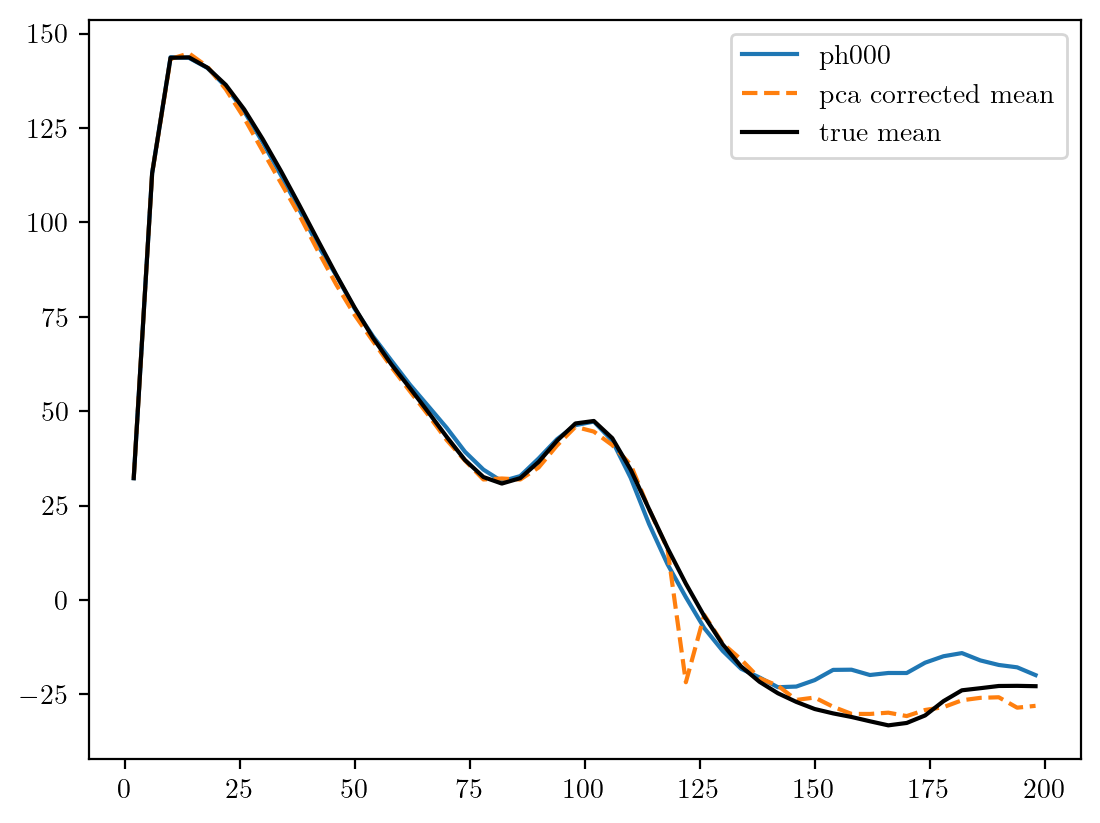

In [155]:
# nphases = 25
# hod_idx = 3
# phase_idx = 0

mean_hods, hods = get_mean_hods(nhods=100)
pca_hods = get_pca_projection(hods[:, 0]/correction_phase[0], npca=4)
mean_phases, phases = get_mean_phases(nphases=25, hod_idx=1)

# s, poles = read_multipoles(phase_idx=phase_idx, hod_idx=hod_idx, seed_idx=0)
# mean_phases, phases = get_mean_phases(nphases=nphases, hod_idx=hod_idx)


fig, ax = plt.subplots()

ax.plot(s, s**2*hods[1, 0], label='ph000')
ax.plot(s, s**2*pca_hods[1], ls='--', label='pca corrected mean')
ax.plot(s, s**2*mean_phases[0], color='k', label='true mean')
ax.legend()
plt.show()
# phase_idx = 0

# for ell in (0, 2, 4):
#     ax[ell//2].plot(s, s**2 * poles[ell//2], label='ph000')
#     ax[ell//2].plot(s, s**2 * mean_phases[ell//2], color='k', lw=2.0, label='true mean')
#     ax[ell//2].plot(s, s**2 * (poles[ell//2] / correction_phase[ell//2]), color='r', ls='--', label='corrected ph000')
    
# ax[0].legend()
# ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
# ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
# ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
# ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
# ax[0].legend()
# plt.tight_layout()
# plt.show()


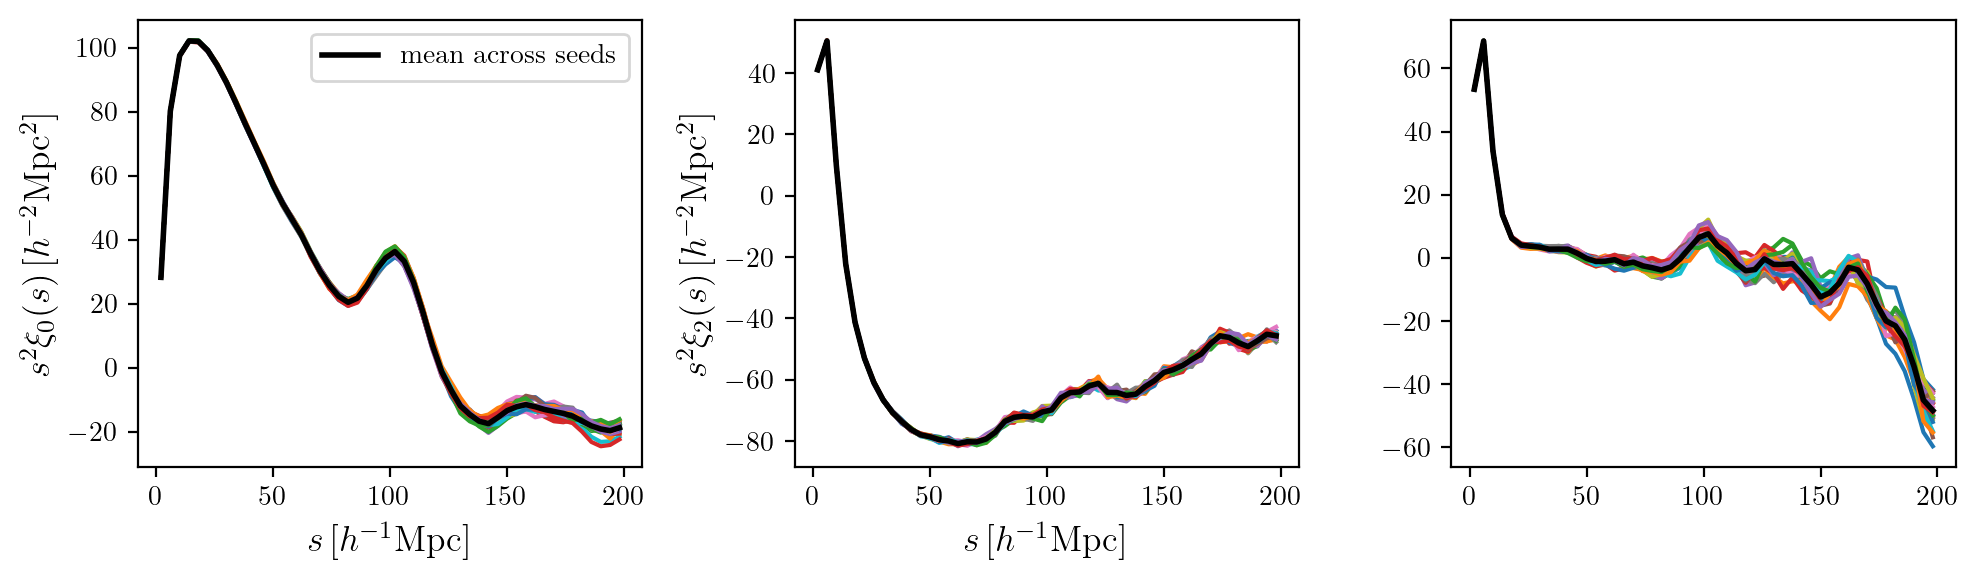

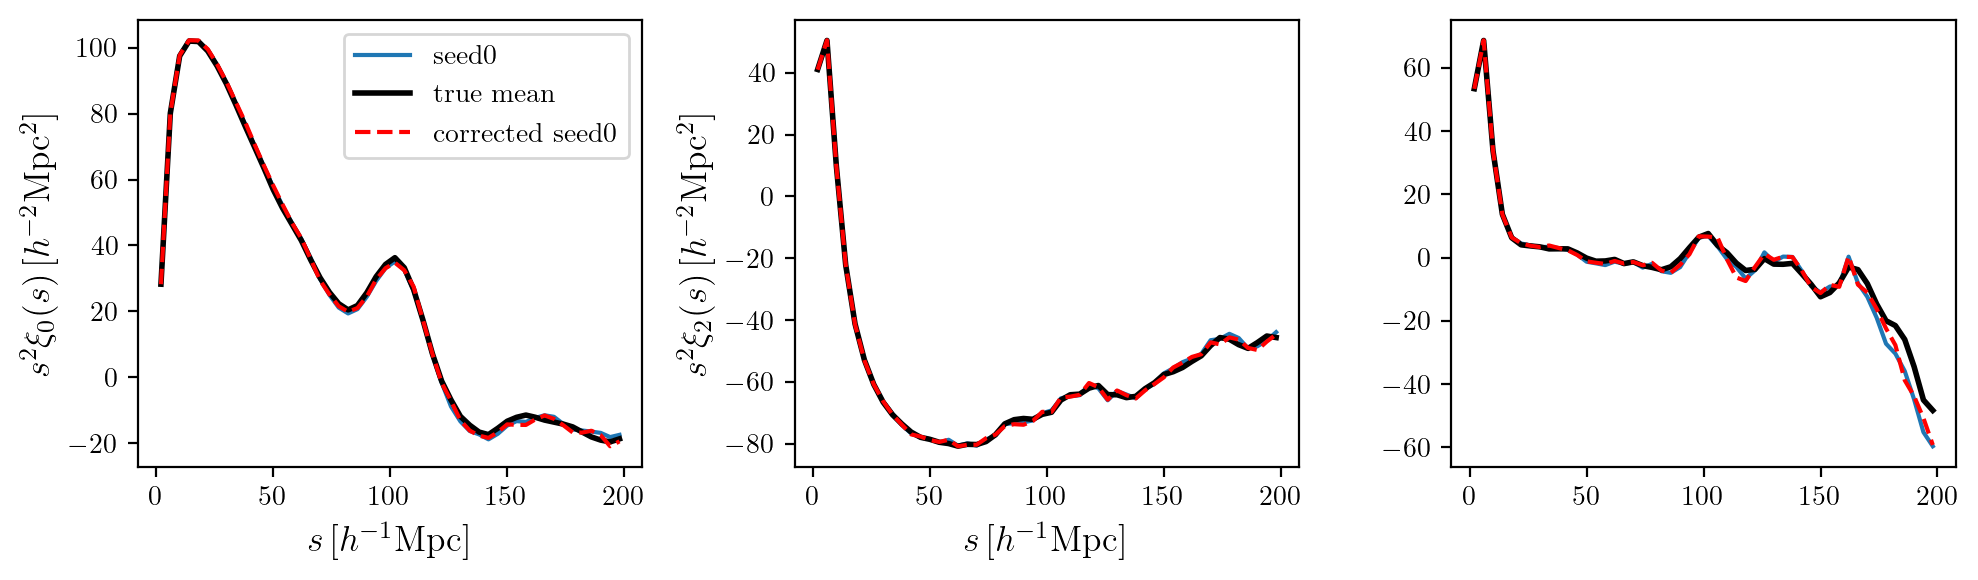

In [11]:
phase_idx = 0
seeds = list(range(25))
hod_idx = 466

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

multipoles_seeds = []

for seed_idx in seeds:

    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph{phase_idx:03}/seed{seed_idx}/'
    data_fn = Path(data_dir) / f'tpcf_hod{hod_idx:03}.npy'
    data = TwoPointCorrelationFunction.load(data_fn)[::4]
    s, multipoles = data(ells=(0, 2, 4), return_sep=True)
    multipoles_seeds.append(multipoles)

    for ell in (0, 2, 4):
        ax[ell//2].plot(s, s**2 * multipoles[ell//2])
    
multipoles_seeds = np.array(multipoles_seeds)
mean_seeds = multipoles_seeds.mean(axis=0)

for ell in (0, 2, 4):
    ax[ell//2].plot(s, s**2 * mean_seeds[ell//2], color='k', lw=2.0, label='mean across seeds')
ax[0].legend()

ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[0].legend()
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 3, figsize=(10, 3))
seed_idx = 0

for ell in (0, 2, 4):
    ax[ell//2].plot(s, s**2 * multipoles_seeds[seed_idx, ell//2], label='seed0')
    ax[ell//2].plot(s, s**2 * mean_seeds[ell//2], color='k', lw=2.0, label='true mean')
    ax[ell//2].plot(s, s**2 * multipoles_seeds[seed_idx, ell//2] / correction_seed[ell//2], color='r', ls='--', label='corrected seed0')
    
ax[0].legend()
ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[0].legend()
plt.tight_layout()
plt.show()


Loaded LHC with shape: (10600, 13), (10600, 100)


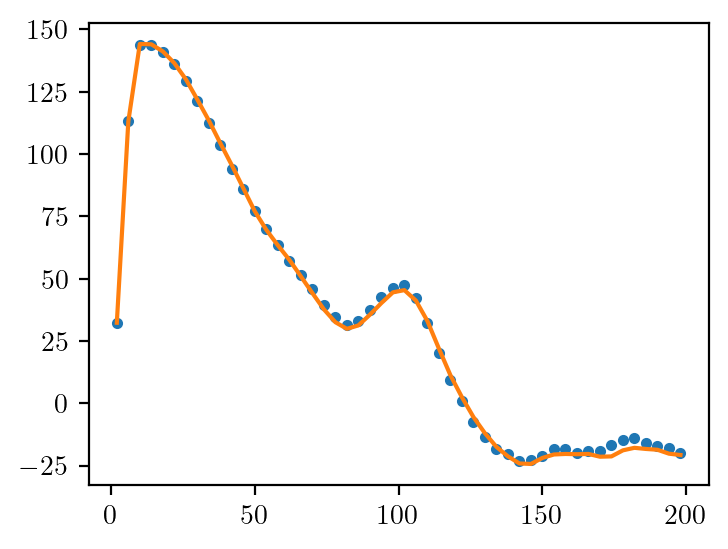

In [229]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from astropy.stats import sigma_clip
from sunbird.emulators import FCN
import torch


def read_lhc(statistic='quantile_data_correlation', n_hod=10000, return_sep=False, abscissa=None, mask_outliers=False):
    if statistic == 'tpcf':
        data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph000/seed0/'
        data_fn = Path(data_dir) / f'tpcf_lhc.npy'
        data = np.load(data_fn, allow_pickle=True).item()
        abscissa = data['s']
    lhc_x = data['lhc_x']
    lhc_y = data['lhc_y']
    if mask_outliers:
        mask = sigma_clip(lhc_y, sigma=6, axis=0, masked=True).mask
        mask = np.all(~mask, axis=1)
        lhc_x = lhc_x[mask]
        lhc_y = lhc_y[mask]
    return lhc_x, lhc_y, abscissa

def read_lhc_phases(nphases=25, statistic='tpcf'):
    lhc_y = []
    lhc_x = []
    for phase_idx in range(nphases):
        data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/{statistic}/z0.5/yuan23_prior/c000_ph{phase_idx:03}/seed0/'
        data_fn = Path(data_dir) / f'{statistic}_lhc.npy'
        data = np.load(data_fn, allow_pickle=True).item()
        abscissa = data['s']
        lhc_y.append(data['lhc_y'])
        phase_x = [phase_idx] * len(data['lhc_x'])
        lhc_x.append(np.hstack([data['lhc_x'], np.array(phase_x)[:, None]]))
    lhc_y = np.concatenate(lhc_y)
    lhc_x = np.concatenate(lhc_x)
    return lhc_x, lhc_y, abscissa

def read_model(statistic, lhc_x, lhc_y):
    if statistic == 'tpcf':
        checkpoint_fn = f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/jul5_leaveout_0/last.ckpt'
    model = FCN.load_from_checkpoint(checkpoint_fn, strict=True)
    model.eval()
    with torch.no_grad():
        pred_y = model.get_prediction(torch.Tensor(lhc_x))
        pred_y = pred_y.numpy()
    if statistic in ['tpcf']:
        pred_y = 10 ** pred_y + np.min(lhc_y) - 1.e-6
    return pred_y

tpcf_x, tpcf_y, tpcf_abs = read_lhc_phases(statistic='tpcf')
print(f'Loaded LHC with shape: {tpcf_x.shape}, {tpcf_y.shape}')
tpcf_model = read_model('tpcf', tpcf_x, tpcf_y)
# tpcf_error = read_error('tpcf')


fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(tpcf_abs, tpcf_abs ** 2 * tpcf_y[1, :len(tpcf_abs)], marker='o', ls='', ms=3.0)
ax.plot(tpcf_abs, tpcf_abs ** 2 * tpcf_model[1, :len(tpcf_abs)])

plt.show()

[13.3252  14.00904 -1.45879  0.31374  0.8325   0.32961  0.6462   0.63238
 -0.1356  -0.41018 -0.13473 -0.47833  0.     ]


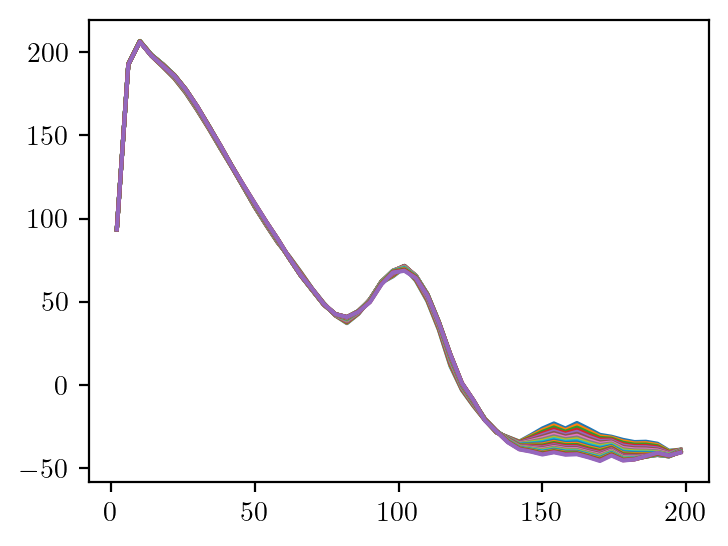

In [244]:
checkpoint_fn = f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/jul5_leaveout_0/last.ckpt'
model = FCN.load_from_checkpoint(checkpoint_fn, strict=True)
model.eval()
params = tpcf_x[5]
print(params)
params_phase = params.copy()
    
fig, ax = plt.subplots(figsize=(4, 3))

for phase_idx in range(25):
    params_phase[-1] = phase_idx

    with torch.no_grad():
        pred_y = model.get_prediction(torch.Tensor(params_phase))
        pred_y = pred_y.numpy()
        pred_y = 10 ** pred_y + np.min(tpcf_y) - 1.e-6

    ax.plot(tpcf_abs, tpcf_abs ** 2 * pred_y[:len(tpcf_abs)])

plt.show()

In [221]:
tpcf_x[466]

array([12.89632, 14.09599, -0.97523,  0.4864 ,  0.10942,  0.56887,
        1.10699,  0.6159 ,  0.0464 , -0.02888, -0.10406,  0.93473,
        0.     ])